In [1]:
import essentia.standard as es

In [8]:
import json
import numpy as np

In [2]:
!curl -SLO https://essentia.upf.edu/models/classifiers/genre_tzanetakis/genre_tzanetakis-musicnn-msd-1.json
!curl -SLO https://essentia.upf.edu/models/classifiers/genre_tzanetakis/genre_tzanetakis-musicnn-msd-1.pb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3101  100  3101    0     0   3087      0 --:--:-- --:--:-- --:--:--     0  0:00:01  0:00:01 --:--:--  3088
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3166k  100 3166k    0     0   767k      0  0:00:04  0:00:04 --:--:--  767k


In [22]:
!wget -q https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.pb
!wget -q https://essentia.upf.edu/models/autotagging/msd/msd-musicnn-1.json

In [23]:
with open('msd-musicnn-1.json', 'r') as json_file:
    metadata = json.load(json_file)

print(metadata.keys())

dict_keys(['name', 'type', 'link', 'version', 'description', 'author', 'email', 'release_date', 'framework', 'framework_version', 'classes', 'model_types', 'dataset', 'schema', 'citation', 'inference'])


In [45]:
MODEL_NAME = 'genre_tzanetakis-musicnn-msd-1'
MODEL_JSON = f'{MODEL_NAME}.json'
MODEL_PB = f'{MODEL_NAME}.pb'
MUSICNN_SR = 16000
#filename = "./data/audio/the_stream.mp3"
filename = "./data/audio/the_river.mp3"
filename = "/Volumes/datascience/data/audio/058/BHLRtqdUzvk.mp3"
audio = es.MonoLoader(filename=filename, sampleRate=MUSICNN_SR)()
musicnn_emb = es.TensorflowPredictMusiCNN(graphFilename='msd-musicnn-1.pb', output='model/dense_1/BiasAdd')(audio)
# Compute mean-embedding across the frames
mean_emb = np.mean(musicnn_emb, axis=0)
mean_emb = mean_emb[np.newaxis, :]  # Each song is a 1x200 row vector


[   INFO   ] TensorflowPredict: Successfully loaded graph file: `msd-musicnn-1.pb`


(96, 50)

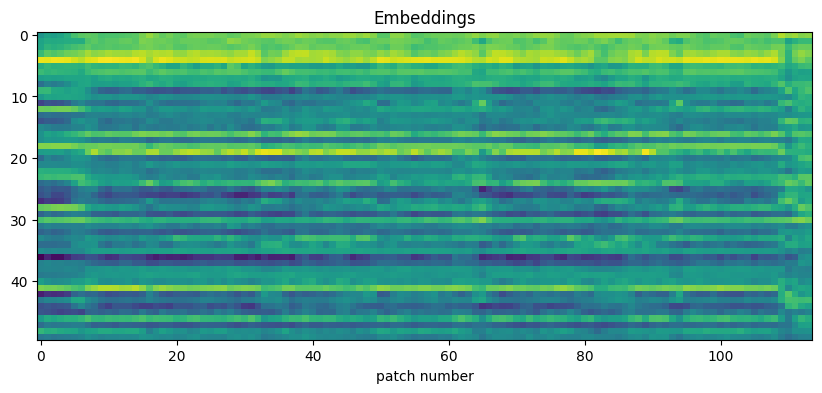

In [46]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.matshow(musicnn_emb.T, aspect='auto')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('patch number')
plt.title('Embeddings')
plt.show()

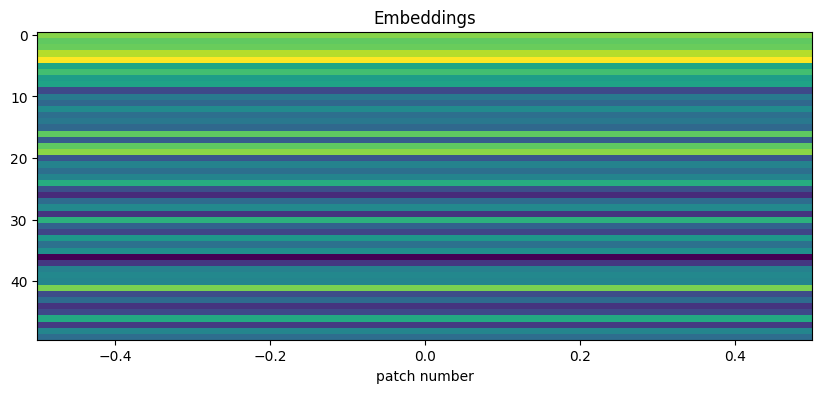

In [47]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.matshow(mean_emb.T, aspect='auto')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('patch number')
plt.title('Embeddings')
plt.show()

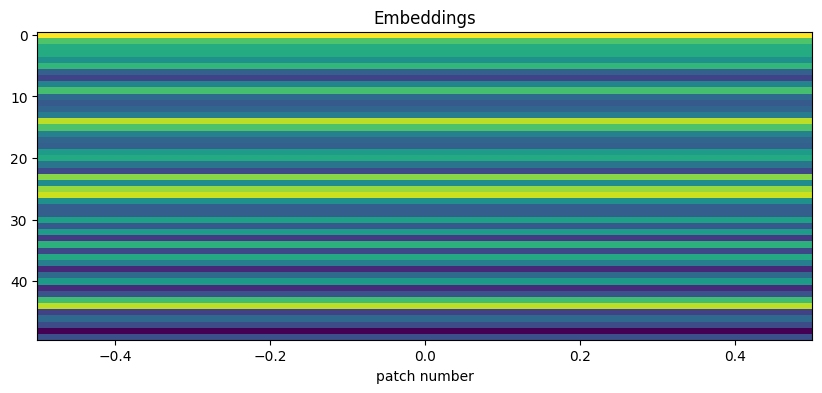

In [39]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.matshow(mean_emb.T, aspect='auto')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('patch number')
plt.title('Embeddings')
plt.show()

In [4]:
MODEL_NAME = 'genre_tzanetakis-musicnn-msd-1'
MODEL_JSON = f'{MODEL_NAME}.json'
MODEL_PB = f'{MODEL_NAME}.pb'

musicnn_metadata = json.load(open(MODEL_JSON, 'r'))
for k, v in musicnn_metadata.items():
    print('{}: {}'.format(k , v))

name: genre GTZAN
type: multi-class classifier
link: https://essentia.upf.edu/models/classifiers/genre_tzanetakis/genre_tzanetakis-musicnn-msd-1.pb
version: 1
description: classification of music by genre
author: Pablo Alonso
email: pablo.alonso@upf.edu
release_date: 2020-03-31
framework: tensorflow
framework_version: 1.15.0
classes: ['blu', 'cla', 'cou', 'dis', 'hip', 'jaz', 'met', 'pop', 'reg', 'roc']
model_types: ['frozen_model']
dataset: {'name': 'the GTZAN Genre Collection', 'citation': '@article{tzanetakis2002musical,\n  title={Musical genre classification of audio signals},\n  author={Tzanetakis, George and Cook, Perry},\n  journal={IEEE Transactions on speech and audio processing},\n  volume={10},\n  number={5},\n  pages={293--302},\n  year={2002},\n  publisher={IEEE}\n}', 'size': '1000 track excerpts, 100 per genre', 'metrics': {'5-fold_cross_validation_normalized_accuracy': 0.83}}
schema: {'inputs': [{'name': 'model/Placeholder', 'type': 'float', 'shape': [187, 96]}], 'output

In [5]:
MUSICNN_SR = 16000

In [28]:
def extract_mean_embedding(filename):
  """
  Extract mean-temporal embedding from audio contained in filename

  Args:
    filename (str): Name of the audio file

  Return:
    Mean embedding of the song
  """
  
  # Load audiofile with essentia monoloader to resample the audios to the necessary sample rate in MusiCNN model
  audio = es.MonoLoader(filename=filename, sampleRate=MUSICNN_SR)()

  # Extract the embedding
  musicnn_emb = es.TensorflowPredictMusiCNN(graphFilename=MODEL_PB, output='model/dense/BiasAdd')(audio)

  # Compute mean-embedding across the frames
  mean_emb = np.mean(musicnn_emb, axis=0)
  mean_emb = mean_emb[np.newaxis, :]  # Each song is a 1x200 row vector

  return mean_emb

In [17]:

def predict_genre(filename):
  """
  Extract mean-temporal embedding from audio contained in filename

  Args:
    filename (str): Name of the audio file

  Return:
    Mean embedding of the song
  """
  
  # Load audiofile with essentia monoloader to resample the audios to the necessary sample rate in MusiCNN model
  audio = es.MonoLoader(filename=filename, sampleRate=MUSICNN_SR)()

  # Extract the embedding
  pred = es.TensorflowPredictMusiCNN(graphFilename=MODEL_PB, output='model/Sigmoid')(audio)

  return pred

In [19]:
x = predict_genre("./data/audio/the_stream.mp3")

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `genre_tzanetakis-musicnn-msd-1.pb`


In [21]:
x.shape

x_mean = np.mean(x, axis=0)
x_mean

array([0.18661058, 0.15519775, 0.01738761, 0.00464012, 0.01020506,
       0.10262992, 0.03051581, 0.00579205, 0.02933334, 0.23826617],
      dtype=float32)

In [29]:
tracks = ["./data/audio/the_stream.mp3"]
# This step may last several minutes
embeddings = np.zeros((len(tracks), 200))  # N songs x 200 embedding-dim

for i, track in enumerate(tracks):
  #embeddings[i, :] = extract_mean_embedding(track)
  embedding = extract_mean_embedding(track)

[   INFO   ] TensorflowPredict: Successfully loaded graph file: `genre_tzanetakis-musicnn-msd-1.pb`


In [31]:
embedding.shape

(1, 200)